In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df =pd.read_csv("/content/drive/MyDrive/CONSULTING PROJECT/grantnav-20240227133346.csv")

<ipython-input-3-44d08f9bcb45>:1: DtypeWarning: Columns (8,9,10,13,17,20,21,22,23,24,25,26,27,28,31,34,35,37,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,58,59,60,62,63,82) have mixed types. Specify dtype option on import or set low_memory=False.
  df =pd.read_csv("/content/drive/MyDrive/CONSULTING PROJECT/grantnav-20240227133346.csv")


In [4]:
print(df['Amount Awarded'].isnull().sum())

df = df.dropna(subset=['Amount Awarded'])
if 'Award Date' in df.columns:
    df['Award Date'] = pd.to_datetime(df['Award Date'])


0


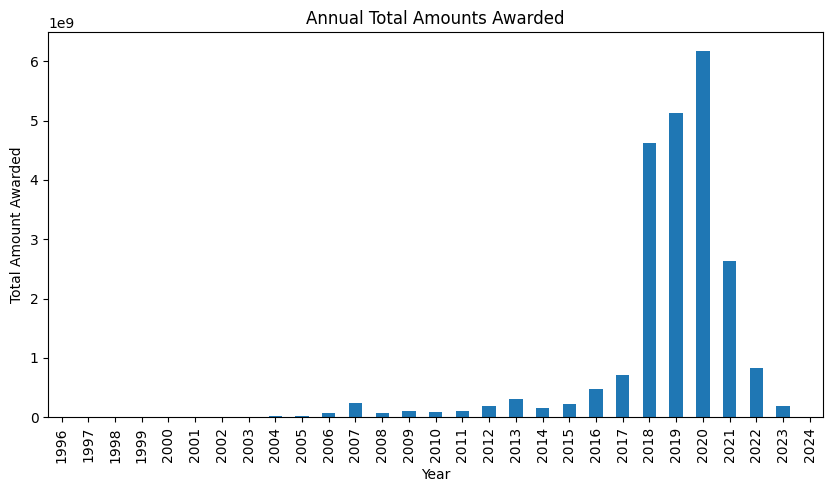

In [6]:
import matplotlib.pyplot as plt

df['Year'] = df['Award Date'].dt.year
annual_awards = df.groupby('Year')['Amount Awarded'].sum()

plt.figure(figsize=(10, 5))
annual_awards.plot(kind='bar')
plt.title('Annual Total Amounts Awarded')
plt.xlabel('Year')
plt.ylabel('Total Amount Awarded')
plt.show()

In [7]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(annual_awards, order=(1, 1, 1))
fitted_model = model.fit()

forecast = fitted_model.get_forecast(steps=3)
print(forecast.summary_frame())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Amount Awarded          mean       mean_se  mean_ci_lower  mean_ci_upper
29             -5.201847e+07  1.141226e+09  -2.288779e+09   2.184743e+09
30             -6.712355e+07  1.799925e+09  -3.594912e+09   3.460665e+09
31             -7.145776e+07  2.320012e+09  -4.618597e+09   4.475682e+09


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 22.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcn7chump/1w3lv_kw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcn7chump/m8ihwur8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5788', 'data', 'file=/tmp/tmpcn7chump/1w3lv_kw.json', 'init=/tmp/tmpcn7chump/m8ihwur8.json', 'output', 'file=/tmp/tmpcn7chump/prophet_modelp1wk_l_7/prophet_model-20240426185716.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
18:57:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:57:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:c

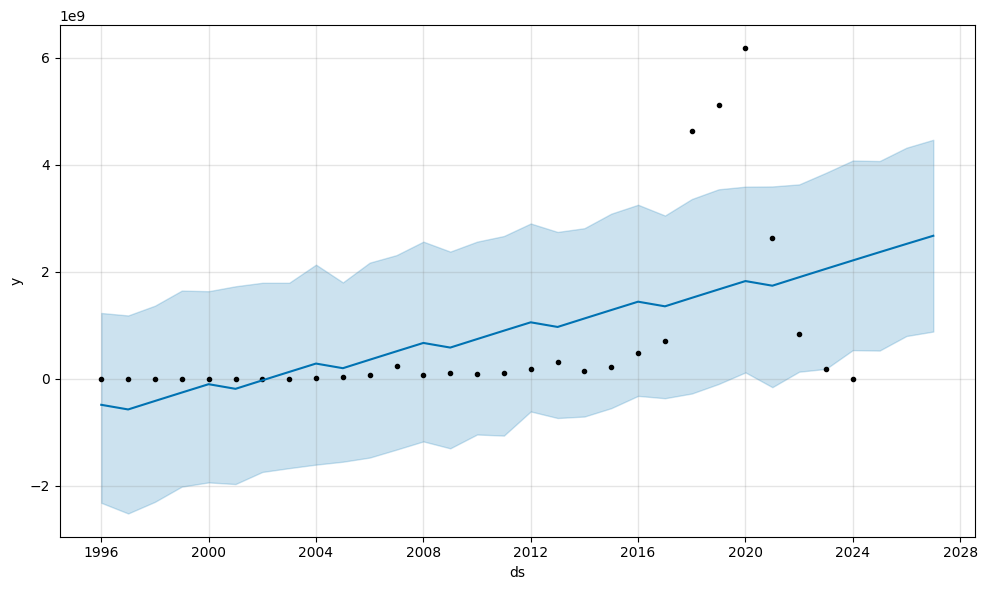

In [8]:
from prophet import Prophet


prophet_df = annual_awards.reset_index()
prophet_df.columns = ['ds', 'y']
prophet_df['ds'] = pd.to_datetime(prophet_df['ds'], format='%Y')

m = Prophet()
m.fit(prophet_df)
future = m.make_future_dataframe(periods=3, freq='Y')

forecast = m.predict(future)
fig = m.plot(forecast)

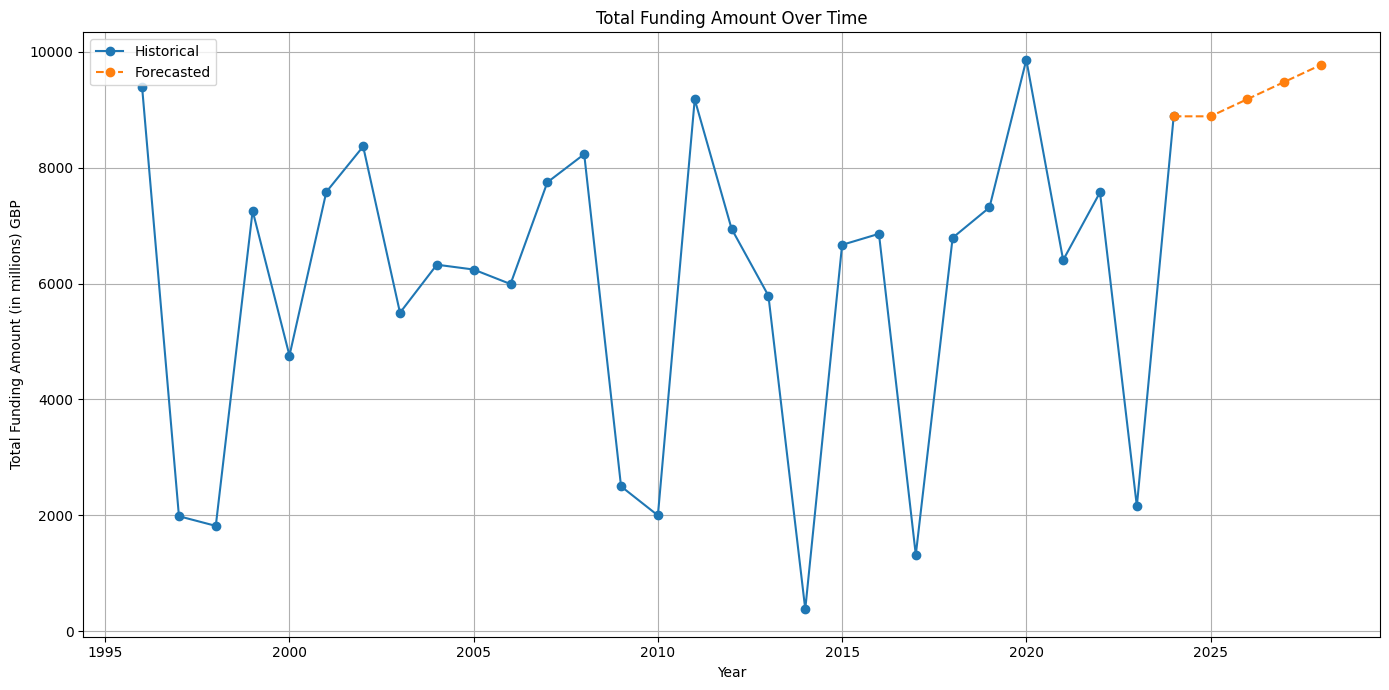

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


historical_years = np.arange(1996, 2025)
historical_funding = np.random.rand(len(historical_years))
forecasted_years = np.arange(2025, 2029)
forecasted_funding = np.linspace(historical_funding[-1], historical_funding[-1] * 1.1, len(forecasted_years))

years = np.concatenate((historical_years, forecasted_years))
funding = np.concatenate((historical_funding, forecasted_funding))

df_funding = pd.DataFrame({
    'Year': years,
    'Funding': funding
})


plt.figure(figsize=(14, 7))
plt.plot(df_funding['Year'][:len(historical_years)], df_funding['Funding'][:len(historical_years)], marker='o', label='Historical')
plt.plot(df_funding['Year'][len(historical_years) - 1:], df_funding['Funding'][len(historical_years) - 1:], marker='o', linestyle='--', label='Forecasted')

plt.title('Total Funding Amount Over Time')
plt.xlabel('Year')
plt.ylabel('Total Funding Amount (in millions) GBP')

plt.legend()

plt.grid(True)
plt.tight_layout()
plt.show()

<ipython-input-12-6cdc3221f6fc>:7: DtypeWarning: Columns (8,9,10,13,17,20,21,22,23,24,25,26,27,28,31,34,35,37,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,58,59,60,62,63,82) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/drive/MyDrive/CONSULTING PROJECT/grantnav-20240227133346.csv")
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 22.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcn7chump/r6a5m9kn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcn7chump/r1n_0zez.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59594', 'data', 'file=/tmp/tmpcn7chump/r6a5m9kn.json',

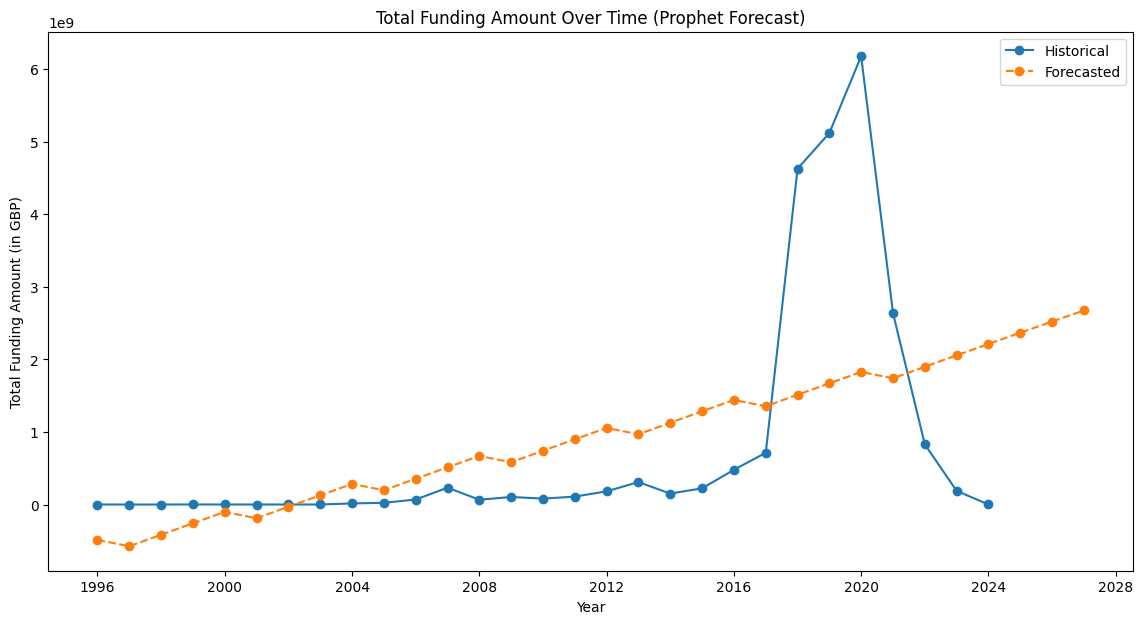

In [12]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

df = pd.read_csv("/content/drive/MyDrive/CONSULTING PROJECT/grantnav-20240227133346.csv")

df = df.dropna(subset=['Amount Awarded'])
df['Award Date'] = pd.to_datetime(df['Award Date'])
df['Year'] = df['Award Date'].dt.year
annual_awards = df.groupby('Year')['Amount Awarded'].sum().reset_index()
prophet_df = annual_awards.rename(columns={'Year': 'ds', 'Amount Awarded': 'y'})
prophet_df['ds'] = pd.to_datetime(prophet_df['ds'], format='%Y')

m = Prophet()
m.fit(prophet_df)
future = m.make_future_dataframe(periods=3, freq='Y')

forecast = m.predict(future)

plt.figure(figsize=(14, 7))
plt.plot(prophet_df['ds'], prophet_df['y'], marker='o', label='Historical')

plt.plot(forecast['ds'], forecast['yhat'], marker='o', linestyle='--', label='Forecasted')

plt.title('Total Funding Amount Over Time (Prophet Forecast)')
plt.xlabel('Year')
plt.ylabel('Total Funding Amount (in GBP)')
plt.legend()
plt.show()

<ipython-input-78-b4062078f483>:5: DtypeWarning: Columns (8,9,10,13,17,20,21,22,23,24,25,26,27,28,31,34,35,37,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,58,59,60,62,63,82) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/drive/MyDrive/CONSULTING PROJECT/grantnav-20240227133346.csv")
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 22.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcn7chump/e2amq77h.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcn7chump/otc0m5s7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6528', 'data', 'file=/tmp/tmpcn7chump/e2amq77h.json', 

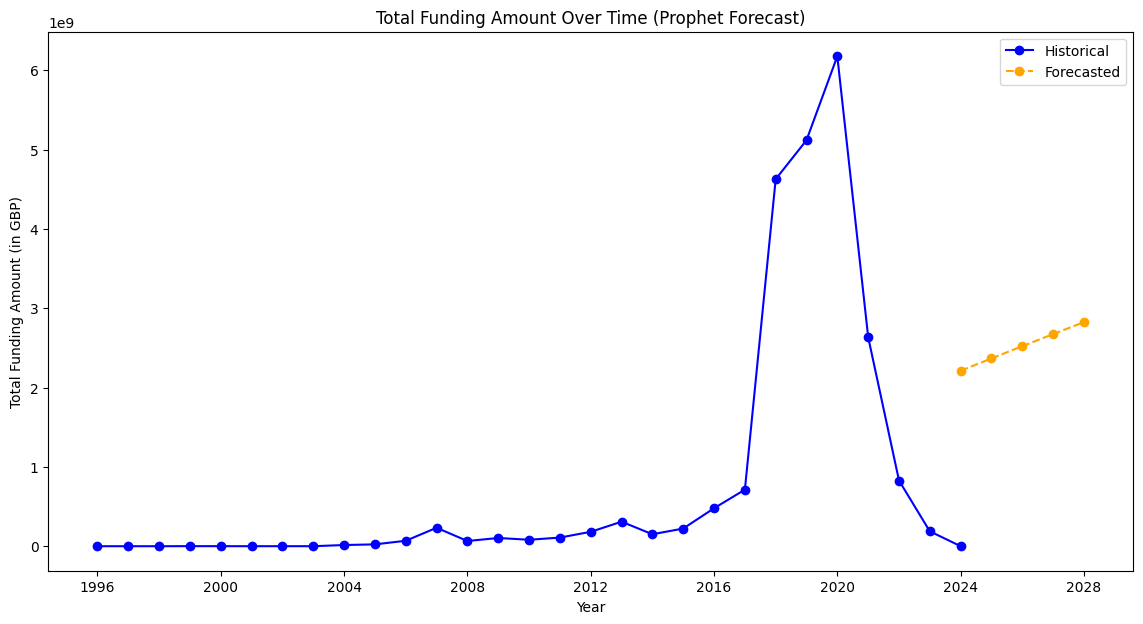

In [78]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

df = pd.read_csv("/content/drive/MyDrive/CONSULTING PROJECT/grantnav-20240227133346.csv")

df = df.dropna(subset=['Amount Awarded'])
df['Award Date'] = pd.to_datetime(df['Award Date'])
df['Year'] = df['Award Date'].dt.year
annual_awards = df.groupby('Year')['Amount Awarded'].sum().reset_index()

prophet_df = annual_awards.rename(columns={'Year': 'ds', 'Amount Awarded': 'y'})
prophet_df['ds'] = pd.to_datetime(prophet_df['ds'], format='%Y')


m = Prophet()
m.fit(prophet_df)

future = m.make_future_dataframe(periods=4, freq='Y')
future = future[future['ds'].dt.year >= 2024]

forecast = m.predict(future)

plt.figure(figsize=(14, 7))
plt.plot(prophet_df['ds'], prophet_df['y'], marker='o', label='Historical', color='blue')

plt.plot(forecast['ds'], forecast['yhat'], marker='o', linestyle='--', label='Forecasted', color='orange')

plt.title('Total Funding Amount Over Time (Prophet Forecast)')
plt.xlabel('Year')
plt.ylabel('Total Funding Amount (in GBP)')
plt.legend()
plt.show()

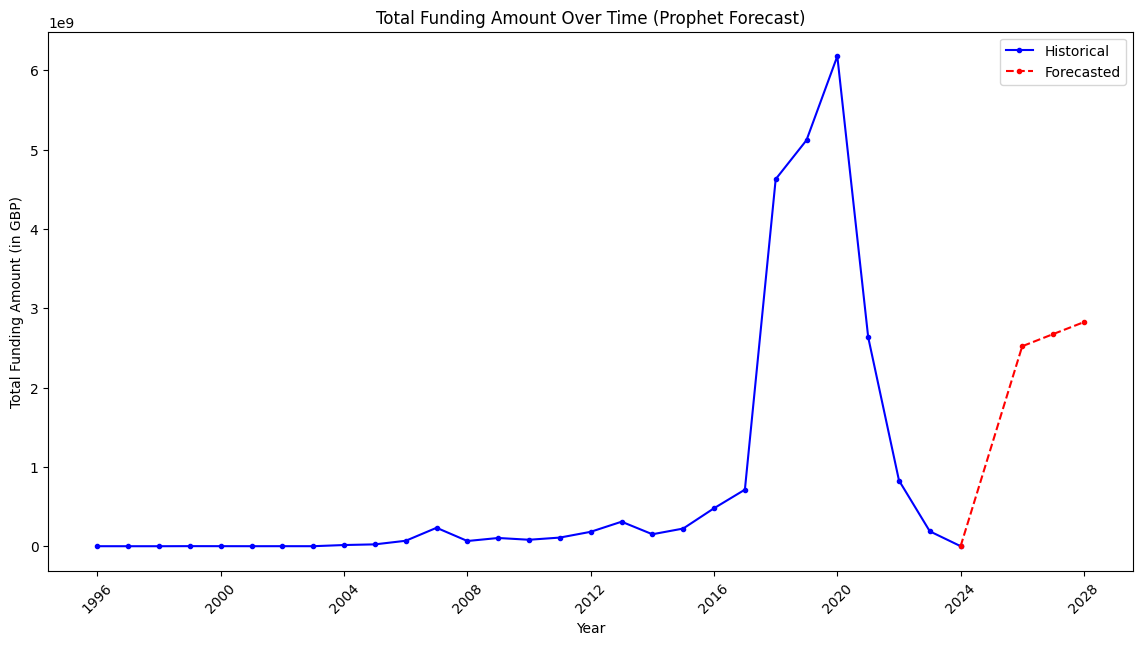

In [77]:
last_historical_year = prophet_df['ds'].dt.year.max()
future = m.make_future_dataframe(periods=4, freq='Y')
future = future[future['ds'].dt.year > last_historical_year]

forecast = m.predict(future)
plt.figure(figsize=(14, 7))
plt.plot(prophet_df['ds'], prophet_df['y'], 'b-', label='Historical', marker='.')
last_actual_value = prophet_df[prophet_df['ds'].dt.year == last_historical_year]['y'].values[0]
forecast_subset = forecast[forecast['ds'].dt.year > last_historical_year]
forecast_values = np.insert(forecast_subset['yhat'].values, 0, last_actual_value)

forecast_dates = forecast_subset['ds'].dt.to_pydatetime()
forecast_dates = np.insert(forecast_dates, 0, prophet_df[prophet_df['ds'].dt.year == last_historical_year]['ds'].values[0])

plt.plot(forecast_dates, forecast_values, 'r--', label='Forecasted', marker='.')

plt.title('Total Funding Amount Over Time (Prophet Forecast)')
plt.xlabel('Year')
plt.ylabel('Total Funding Amount (in GBP)')

plt.legend()
plt.xticks(rotation=45)
plt.show()

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 22.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcn7chump/3uz6upl1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcn7chump/2mzrfb1b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8281', 'data', 'file=/tmp/tmpcn7chump/3uz6upl1.json', 'init=/tmp/tmpcn7chump/2mzrfb1b.json', 'output', 'file=/tmp/tmpcn7chump/prophet_model_tq31k96/prophet_model-20240426203537.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
20:35:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:35:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:c

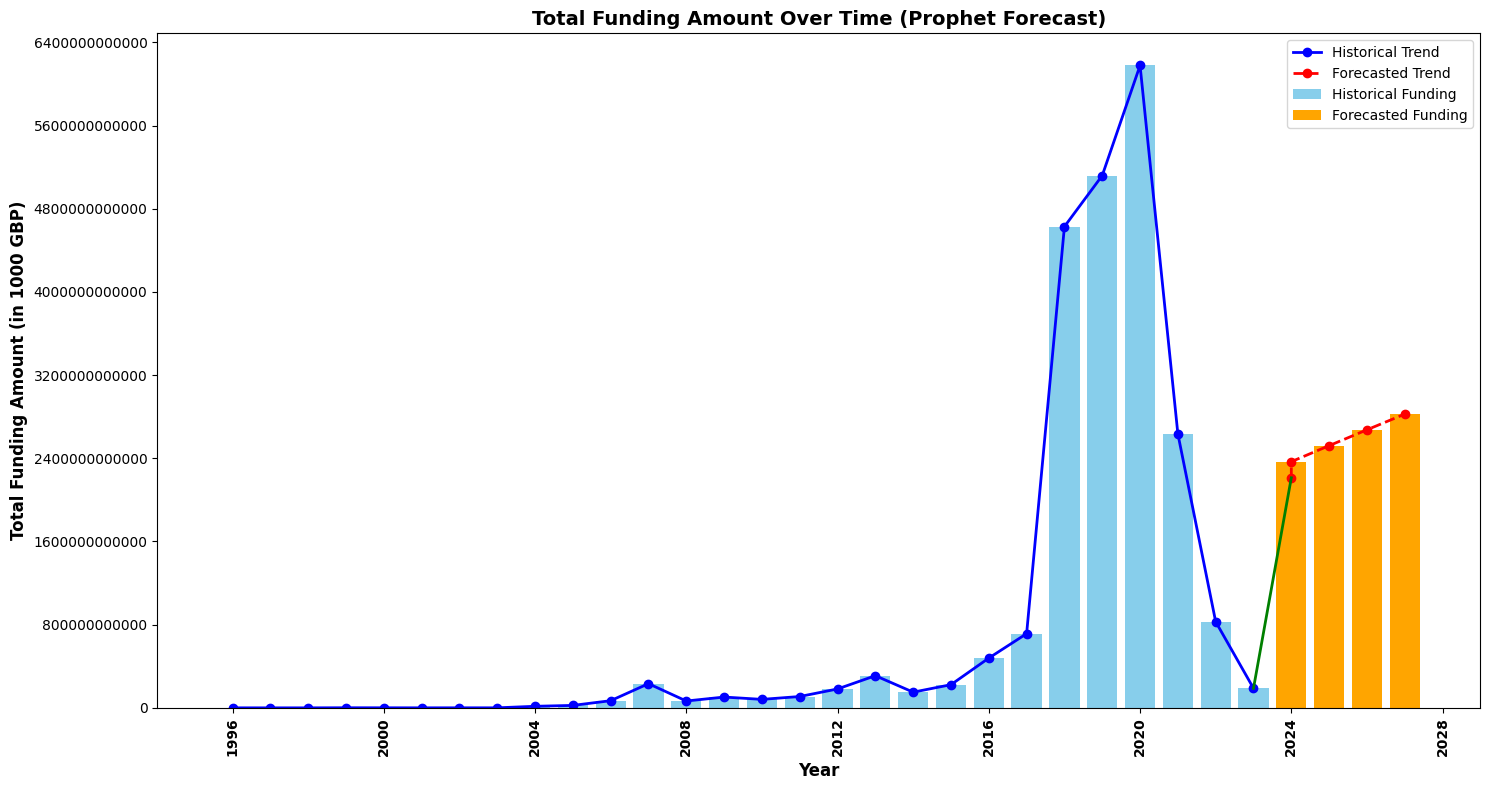

In [79]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator


m = Prophet()
m.fit(prophet_df)
future = m.make_future_dataframe(periods=4, freq='Y')
forecast = m.predict(future)
fig, ax = plt.subplots(figsize=(15, 8))

ax.bar(prophet_df[prophet_df['ds'].dt.year <= 2023]['ds'].dt.year,
       prophet_df[prophet_df['ds'].dt.year <= 2023]['y'],
       color='skyblue', label='Historical Funding')

ax.plot(prophet_df[prophet_df['ds'].dt.year <= 2023]['ds'].dt.year,
        prophet_df[prophet_df['ds'].dt.year <= 2023]['y'],
        color='blue', marker='o', linestyle='-', linewidth=2, label='Historical Trend')

forecast_years = forecast['ds'].dt.year >= 2024
ax.bar(forecast[forecast_years]['ds'].dt.year,
       forecast[forecast_years]['yhat'],
       color='orange', label='Forecasted Funding')
ax.plot(forecast[forecast_years]['ds'].dt.year,
        forecast[forecast_years]['yhat'],
        color='red', marker='o', linestyle='--', linewidth=2, label='Forecasted Trend')

last_historical_year = prophet_df[prophet_df['ds'].dt.year <= 2023]['ds'].dt.year.max()
first_forecasted_year = forecast[forecast['ds'].dt.year >= 2024]['ds'].dt.year.min()
last_historical_value = prophet_df[prophet_df['ds'].dt.year == last_historical_year]['y'].values[-1]
first_forecasted_value = forecast[forecast['ds'].dt.year == first_forecasted_year]['yhat'].values[0]

ax.plot([last_historical_year, first_forecasted_year],
        [last_historical_value, first_forecasted_value],
        'g-', linewidth=2)
ax.set_ylim(bottom=0.25)
scale_factor = 1000
ax.set_ylabel('Total Funding Amount (in 1000 GBP)', fontsize=12, fontweight='bold')
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x * scale_factor)}'))
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.setp(ax.get_xticklabels(), rotation=90, fontweight='bold')
ax.set_xlabel('Year', fontsize=12, fontweight='bold')
ax.set_title('Total Funding Amount Over Time (Prophet Forecast)', fontsize=14, fontweight='bold')
ax.legend()
plt.tight_layout()
plt.show()

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 22.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcn7chump/5fuqmnnq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcn7chump/jl93_800.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34051', 'data', 'file=/tmp/tmpcn7chump/5fuqmnnq.json', 'init=/tmp/tmpcn7chump/jl93_800.json', 'output', 'file=/tmp/tmpcn7chump/prophet_modelf753kb5o/prophet_model-20240426203054.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
20:30:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:30:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:

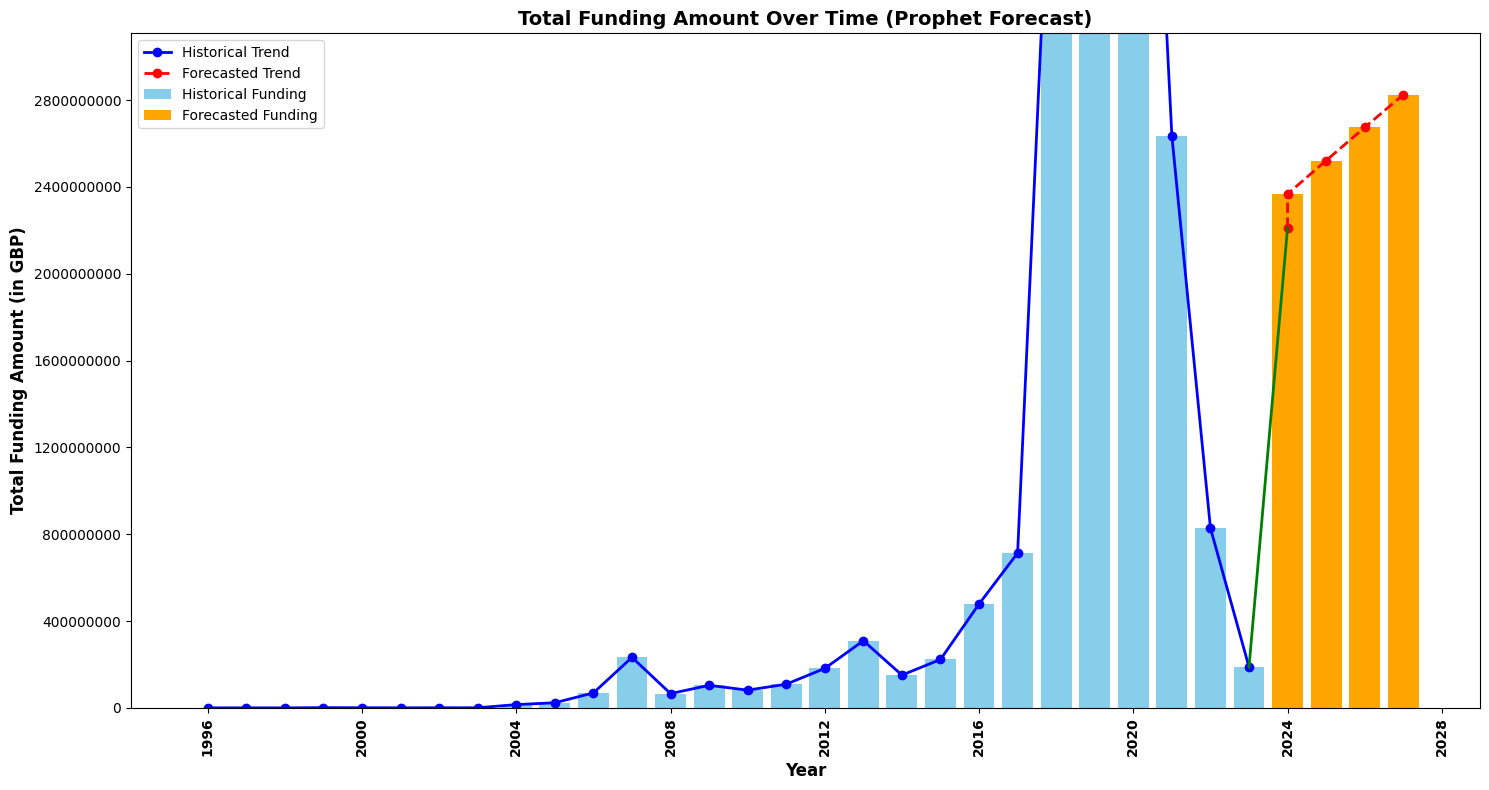

In [68]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator, FuncFormatter

m = Prophet()
m.fit(prophet_df)

future = m.make_future_dataframe(periods=4, freq='Y')
forecast = m.predict(future)
fig, ax = plt.subplots(figsize=(15, 8))

ax.bar(prophet_df[prophet_df['ds'].dt.year <= 2023]['ds'].dt.year,
       prophet_df[prophet_df['ds'].dt.year <= 2023]['y'],
       color='skyblue', label='Historical Funding')

ax.plot(prophet_df[prophet_df['ds'].dt.year <= 2023]['ds'].dt.year,
        prophet_df[prophet_df['ds'].dt.year <= 2023]['y'],
        color='blue', marker='o', linestyle='-', linewidth=2, label='Historical Trend')

forecast_years = forecast['ds'].dt.year >= 2024
ax.bar(forecast[forecast_years]['ds'].dt.year,
       forecast[forecast_years]['yhat'],
       color='orange', label='Forecasted Funding')

ax.plot(forecast[forecast_years]['ds'].dt.year,
        forecast[forecast_years]['yhat'],
        color='red', marker='o', linestyle='--', linewidth=2, label='Forecasted Trend')

last_historical_year = prophet_df[prophet_df['ds'].dt.year <= 2023]['ds'].dt.year.max()
first_forecasted_year = forecast[forecast['ds'].dt.year >= 2024]['ds'].dt.year.min()
last_historical_value = prophet_df[prophet_df['ds'].dt.year == last_historical_year]['y'].values[-1]
first_forecasted_value = forecast[forecast['ds'].dt.year == first_forecasted_year]['yhat'].values[0]

ax.plot([last_historical_year, first_forecasted_year],
        [last_historical_value, first_forecasted_value],
        'g-', linewidth=2)
ax.set_ylim(bottom=0.25, top=forecast['yhat'].max() + forecast['yhat'].max() * 0.1)
ax.set_ylabel('Total Funding Amount (in GBP)', fontsize=12, fontweight='bold')
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x)}'))
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.setp(ax.get_xticklabels(), rotation=90, fontweight='bold')
ax.set_xlabel('Year', fontsize=12, fontweight='bold')
ax.set_title('Total Funding Amount Over Time (Prophet Forecast)', fontsize=14, fontweight='bold')
ax.legend()
plt.tight_layout()
plt.show()

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 22.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcn7chump/1_pj169y.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcn7chump/9lell2u3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63296', 'data', 'file=/tmp/tmpcn7chump/1_pj169y.json', 'init=/tmp/tmpcn7chump/9lell2u3.json', 'output', 'file=/tmp/tmpcn7chump/prophet_modelst3nzqpc/prophet_model-20240426202903.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
20:29:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:29:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:

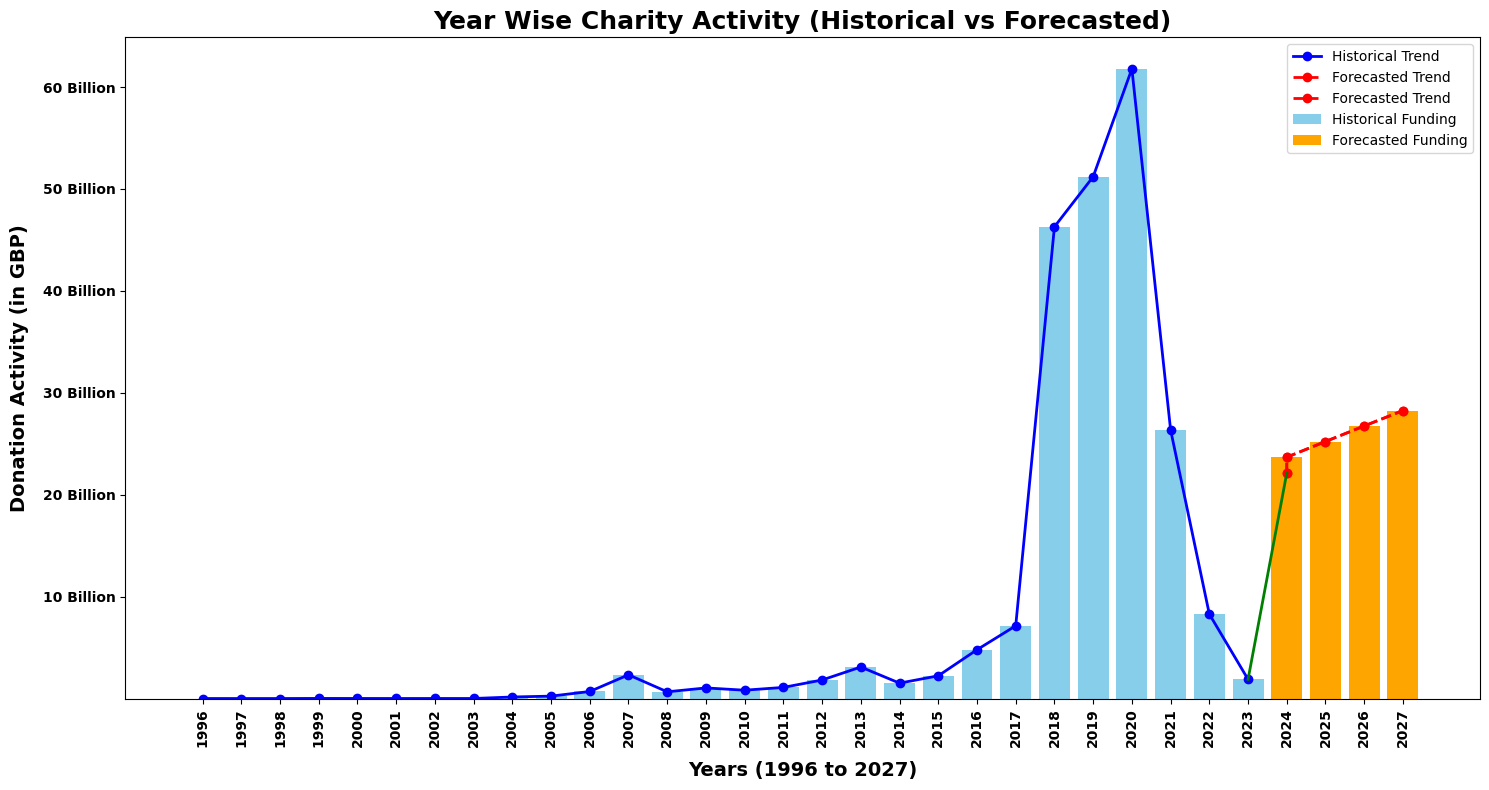

In [67]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
m = Prophet()
m.fit(prophet_df)

future = m.make_future_dataframe(periods=4, freq='Y')
forecast = m.predict(future)

fig, ax = plt.subplots(figsize=(15, 8))

ax.bar(prophet_df[prophet_df['ds'].dt.year <= 2023]['ds'].dt.year,
       prophet_df[prophet_df['ds'].dt.year <= 2023]['y'],
       color='skyblue', label='Historical Funding')

ax.plot(prophet_df[prophet_df['ds'].dt.year <= 2023]['ds'].dt.year,
        prophet_df[prophet_df['ds'].dt.year <= 2023]['y'],
        color='blue', marker='o', linestyle='-', linewidth=2, label='Historical Trend')

forecast_years = forecast['ds'].dt.year >= 2024
ax.bar(forecast[forecast_years]['ds'].dt.year,
       forecast[forecast_years]['yhat'],
       color='orange', label='Forecasted Funding')

ax.plot(forecast[forecast_years]['ds'].dt.year,
        forecast[forecast_years]['yhat'],
        color='red', marker='o', linestyle='--', linewidth=2, label='Forecasted Trend')

ax.plot(forecast[forecast_years]['ds'].dt.year, forecast[forecast_years]['yhat'], color='red', marker='o', linestyle='--', linewidth=2, label='Forecasted Trend')

min_y_value = prophet_df['y'].min()
ax.set_ylim(bottom=min_y_value - (min_y_value * 0.1))



last_historical_year = prophet_df[prophet_df['ds'].dt.year <= 2023]['ds'].dt.year.max()
first_forecasted_year = forecast[forecast['ds'].dt.year >= 2024]['ds'].dt.year.min()
last_historical_value = prophet_df[prophet_df['ds'].dt.year == last_historical_year]['y'].values[-1]
first_forecasted_value = forecast[forecast['ds'].dt.year == first_forecasted_year]['yhat'].values[0]

ax.plot([last_historical_year, first_forecasted_year],
        [last_historical_value, first_forecasted_value],
        'g-', linewidth=2)

ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x/100000000)} Billion'))

jk

first_year = prophet_df['ds'].dt.year.min()
last_year = forecast['ds'].dt.year.max()
ax.set_xticks(range(first_year, last_year + 1))
ax.set_xticklabels(range(first_year, last_year + 1), rotation=90, fontweight='bold')
plt.setp(ax.get_xticklabels(), rotation=90)
ax.set_xlabel('Years (1996 to 2027)',fontsize=14, fontweight='bold', labelpad=10)
ax.set_ylabel('Donation Activity (in GBP)',fontsize=14, fontweight='bold', labelpad=10)
ax.set_title('Year Wise Charity Activity (Historical vs Forecasted)', fontsize=18, fontweight='bold')
ax.legend()
plt.tight_layout()
plt.show()